# Jugadores de basketball

## Librerias

In [33]:
!pip install pyclustering

In [34]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from pyclustering.cluster.kmedoids import kmedoids;
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt



In [35]:
basket = pd.read_csv("basketball.csv")
basket.head(8)

,assists_per_minute,height,time_played,age,points_per_minute
0,0.0888,201,36.02,28,0.5885
1,0.1399,198,39.32,30,0.8291
2,0.0747,198,38.80,26,0.4974
3,0.0983,191,40.71,30,0.5772
4,0.1276,196,38.40,28,0.5703
5,0.1671,201,34.10,31,0.5835
6,0.1906,193,36.20,30,0.5276
7,0.1061,191,36.75,27,0.5523


### Analizamos la data

In [36]:
    basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   assists_per_minute  96 non-null     float64
 1   height              96 non-null     int64  
 2   time_played         96 non-null     float64
 3   age                 96 non-null     int64  
 4   points_per_minute   96 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.9 KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


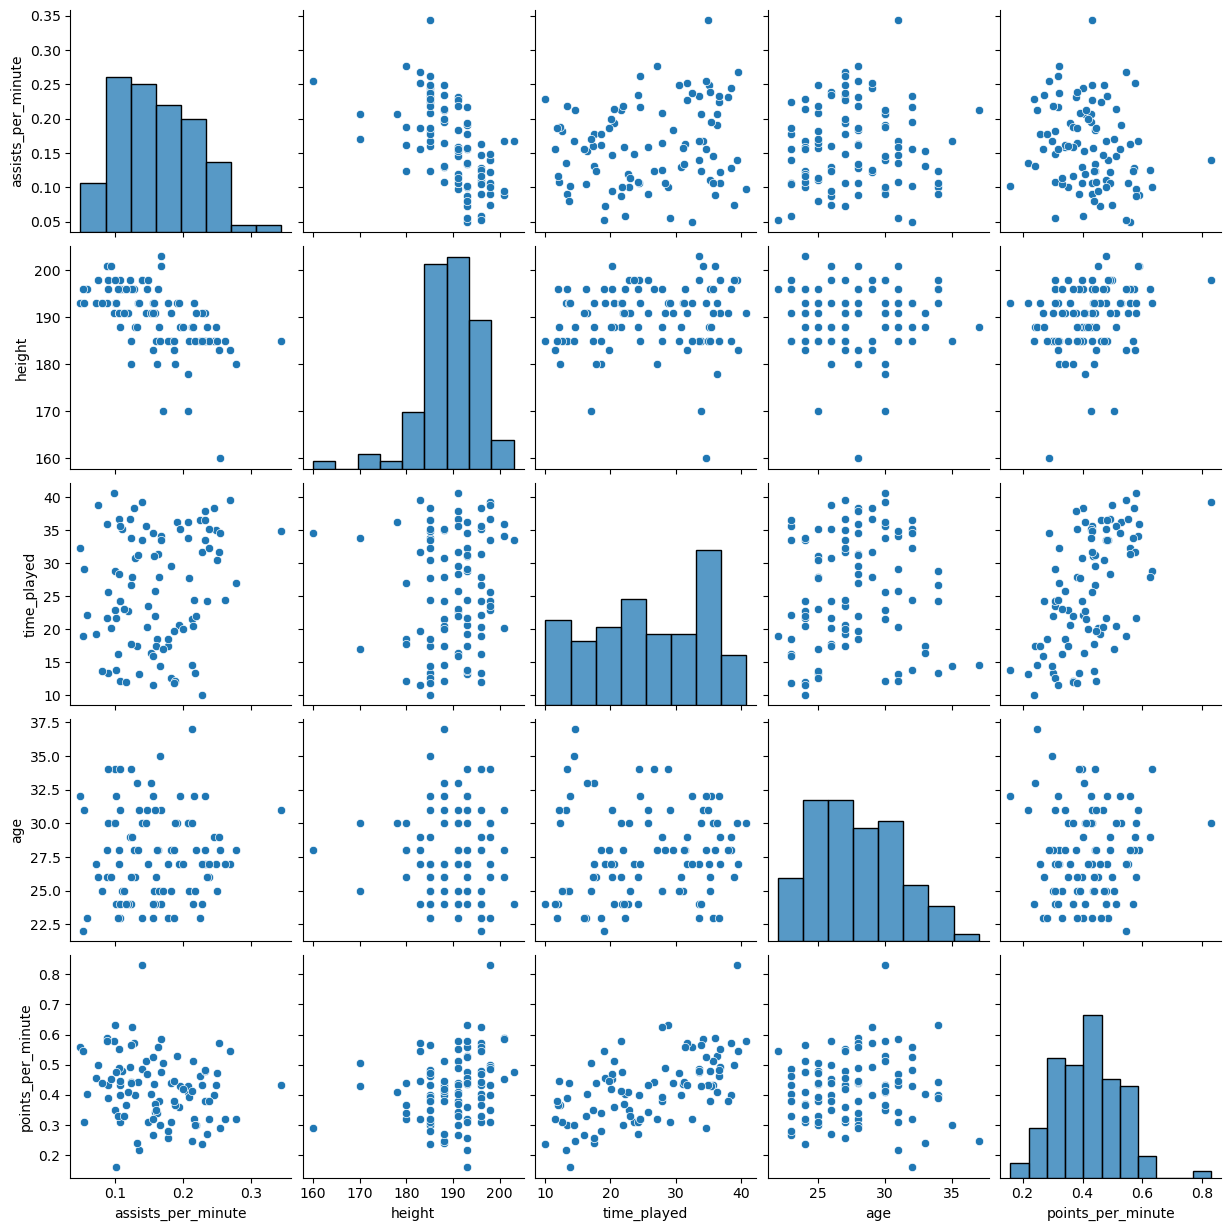

In [37]:
sns.pairplot(basket);

## Clustering Jerarquico

### Normalizamos los datos

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(basket)
normalized = scaler.transform(basket)
normalized1 = pd.DataFrame(normalized,columns=list(basket.columns))
zscore_df = normalized1
zscore_df.head(10)

,assists_per_minute,height,time_played,age,points_per_minute
0,0.133877,0.953488,0.846882,0.400000,0.640788
1,0.307509,0.883721,0.954620,0.533333,1.000000
2,0.085967,0.883721,0.937643,0.266667,0.504778
3,0.166157,0.720930,1.000000,0.533333,0.623918
4,0.265715,0.837209,0.924584,0.400000,0.613616
5,0.399932,0.953488,0.784198,0.600000,0.633323
6,0.479783,0.767442,0.852759,0.533333,0.549866
7,0.192661,0.720930,0.870715,0.333333,0.586742
8,0.663269,0.581395,0.925563,0.466667,0.360406
9,0.399592,1.000000,0.765916,0.133333,0.474321


### Estandarizamos los datos

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(basket)
standarizar = scaler.transform(basket)
standarizar1 = pd.DataFrame(standarizar,columns=list(basket.columns))
zscore_df1 = standarizar1
zscore_df1.head(10)

,assists_per_minute,height,time_played,age,points_per_minute
0,-1.218687,1.606715,1.174850,0.078724,1.553464
1,-0.359587,1.173443,1.559641,0.683326,3.775175
2,-1.455738,1.173443,1.499007,-0.525878,0.712243
3,-1.058972,0.162477,1.721720,0.683326,1.449120
4,-0.566376,0.884596,1.452366,0.078724,1.385405
5,0.097703,1.606715,0.950972,0.985628,1.507294
6,0.492788,0.451324,1.195839,0.683326,0.991111
7,-0.927837,0.162477,1.259971,-0.223577,1.219192
8,1.400643,-0.704066,1.455864,0.381025,-0.180689
9,0.096022,1.895562,0.885674,-1.130480,0.523868


## Dendograma

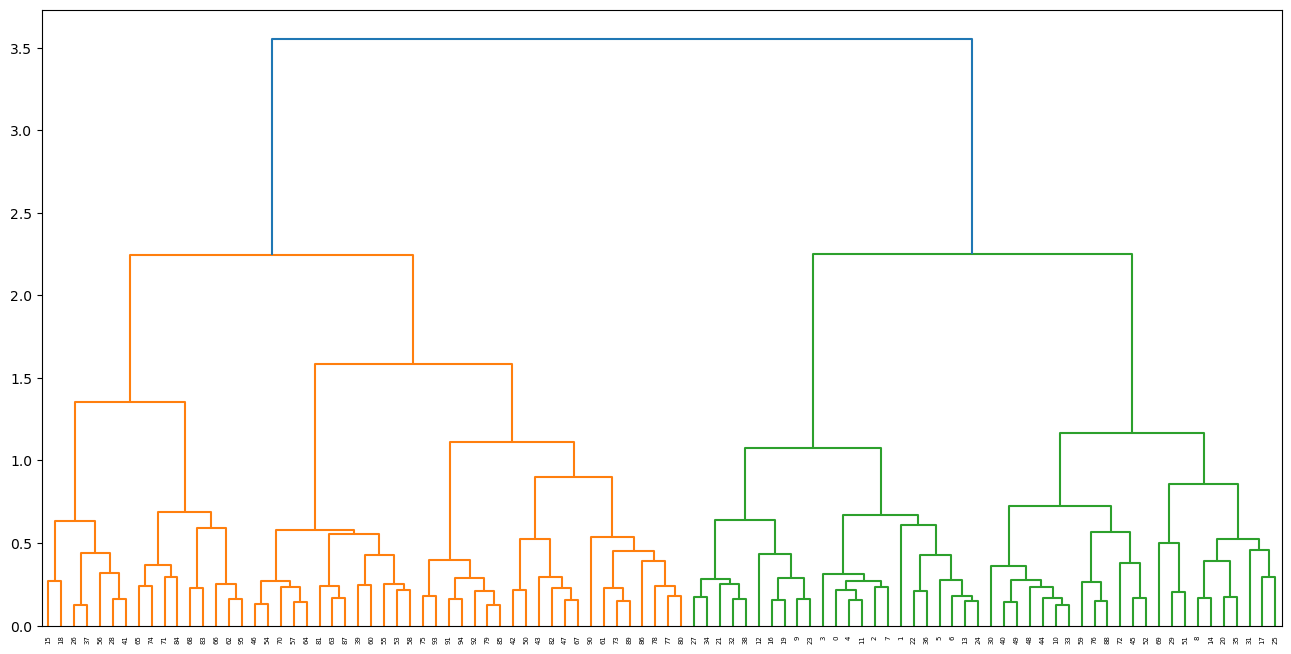

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

seed = 16
np.random.seed(seed)

linked = linkage(zscore_df,method = 'ward')

labelList = range(1, 11)

plt.figure(figsize=(16, 8))  
dendrogram(linked)
plt.show()  

## Construimos el Modelo Jerarquico con 4 cluster

In [41]:
from sklearn.cluster import AgglomerativeClustering

seed = 16
np.random.seed(seed)

cluster_Ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_Ag.fit_predict(zscore_df)   ## Recordar que aca se reemplaza su dataframe

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
label_ag = pd.DataFrame(cluster_Ag.labels_,columns= ['Cluster'])
cluster_Jerarq = pd.concat([basket,label_ag['Cluster']], axis=1)
cluster_Jerarq

,assists_per_minute,height,time_played,age,points_per_minute,Cluster
0,0.0888,201,36.02,28,0.5885,2
1,0.1399,198,39.32,30,0.8291,2
2,0.0747,198,38.80,26,0.4974,2
3,0.0983,191,40.71,30,0.5772,2
4,0.1276,196,38.40,28,0.5703,2
...,...,...,...,...,...,...
91,0.1554,183,11.58,24,0.3195,0
92,0.2282,185,10.08,24,0.2381,0
93,0.1778,185,18.56,23,0.2802,0
94,0.1863,185,11.81,23,0.3810,0


## Visualizacion en 2D

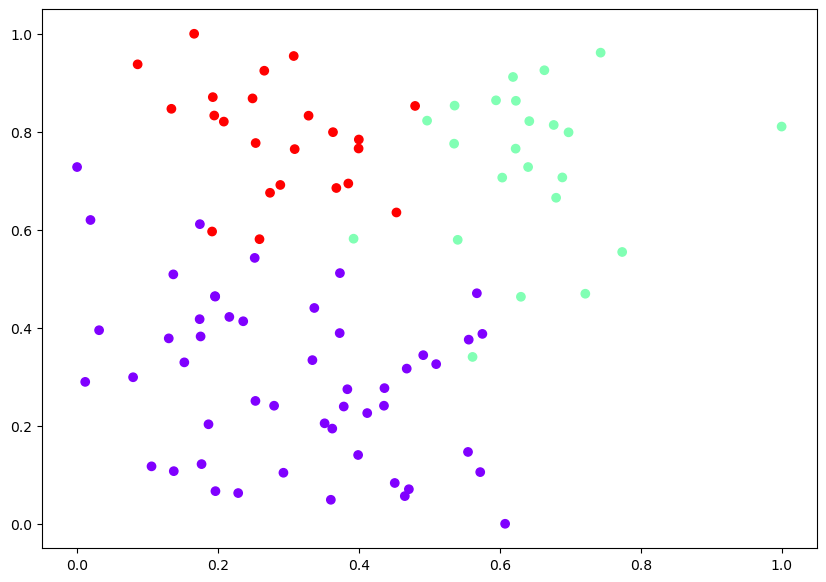

In [43]:
plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['assists_per_minute'], zscore_df['time_played'], c=cluster_Ag.labels_ , cmap='rainbow') 

## Visualizacion en 3D

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(zscore_df.assists_per_minute, zscore_df.time_played, zscore_df.age, c=cluster_Ag.labels_ ,cmap='rainbow')

<Figure size 1800x900 with 0 Axes>

In [45]:
from sklearn.metrics import silhouette_score
silhouette_score(basket.values, cluster_Ag.labels_, metric='euclidean')

0.26203842428645263

## Usamos Kmedoides con P.A.M

Debemos de fijar la cantidad de cluster

In [46]:
seed = 16 # con esto definimos la semilla o con random_state
np.random.seed(seed)

kmedoids_instance = kmedoids(zscore_df.values, [3, 6, 4],random_state=16); ## para probar mas cluster solo agregar en
# la lista [3, 6, 4] aca seria para 3 cluster si quieres 4 agrega [3, 6, 4, 10] un valor cualesquiera por que son aleatorios

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(kmedoids_instance.process);
print("Execution time : ", ticks, "\n");

#returns the clusters 
clusters_Kmed = kmedoids_instance.get_clusters();

#returns the mediods 
medoids = kmedoids_instance.get_medoids();

print("Index of the points that are in a cluster : ",clusters_Kmed)
print("The index of medoids that algorithm found to be best :", medoids)

Execution time :  0.004089600000042992 

Index of the points that are in a cluster :  [[39, 46, 47, 54, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95], [8, 10, 14, 17, 20, 25, 29, 30, 31, 33, 35, 40, 44, 48, 49, 51, 52, 59, 69, 88], [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 18, 19, 21, 22, 23, 24, 26, 27, 28, 32, 34, 36, 37, 38, 41, 42, 43, 45, 50, 53, 55, 56, 65]]
The index of medoids that algorithm found to be best : [80, 10, 38]


Adecuamos los cluster con etiquetas

In [1]:
label = pd.DataFrame()
for i in range(3):  # Esto es para 3 cluster si quiero 4 cambio aca el valor anda mas  
    print(i)
    a = pd.DataFrame(clusters_Kmed[i],columns = ['Index']) 
    a['Cluster'] = i
    label = label.append(a)

NameError: name 'pd' is not defined

In [ ]:
label_f = label.sort_values(by ='Index').reset_index(drop='true')
cluster_Med = pd.concat([basket,label_f['Cluster']], axis=1)
cluster_Med

In [ ]:
cluster_Med.Cluster.value_counts()

## Visualizacion en 2D

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['assists_per_minute'], zscore_df['points_per_minute'], c=cluster_Med.Cluster, cmap='rainbow') 

## Visualizacion en 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(zscore_df.assists_per_minute, zscore_df.time_played, zscore_df.age, c=cluster_Med.Cluster,cmap='rainbow')

### Métrica de Silueta

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(basket.values, cluster_Med.Cluster, metric='euclidean')

## Usamos Kmeans

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=16)
kmeans.fit(zscore_df.values)
centroids = kmeans.cluster_centers_
print("The index of kemans that algorithm found to be best :", kmeans.labels_)

Adecuamos los cluster con etiquetas

In [ ]:
label_km = pd.DataFrame(kmeans.labels_,columns= ['Cluster'])
cluster_kmeans = pd.concat([basket,label_km['Cluster']], axis=1)
cluster_kmeans

In [ ]:
cluster_kmeans.Cluster.value_counts()

## Visualizacion en 2D

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(zscore_df['assists_per_minute'], zscore_df['points_per_minute'], c=cluster_kmeans.Cluster, cmap='rainbow') 

## Visualizacion en 3D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(zscore_df.assists_per_minute, zscore_df.time_played, zscore_df.age, c=cluster_kmeans.Cluster ,cmap='rainbow')

NameError: name 'zscore_df' is not defined

<Figure size 1800x900 with 0 Axes>

### Métrica de Silueta

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(basket.values, cluster_kmeans.Cluster, metric='euclidean')